<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Matemática e Estatística Aplicada Para Data Science, Machine Learning e IA</font>
## <font color='blue'>Projeto 8</font>
### <font color='blue'>Aplicação e Interpretação de Testes Estatísticos Para Analisar a Taxa de Ocupação de Imóveis</font>

**Quais fatores mais influenciam na taxa de ocupação de imóveis?**

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split

# Import para padronização dos dados
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando os Dados e Definindo a Variável Alvo

In [4]:
# Carregando os dados
dados = pd.read_csv('dataset.csv')

In [5]:
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2


A taxa de ocupação das residências (variável **taxa_ocupacao**) é a variável alvo e o restante são as variáveis independentes com base nas quais vamos analisar a taxa de ocupação das casas dos bairros de uma determinada cidade.

Primeiro vamos verificar quais variáveis preditoras devem ser usadas.

In [6]:
# Vamos criar uma cópia dos dados (precisaremos dessa cópia mais tarde)
dados2 = dados.copy()

## Análise Exploratória

In [7]:
dados.shape

(500, 14)

In [8]:
dados.dtypes

numero_medio_quartos_por_residencia    float64
idade_media_residencias                float64
taxa_criminalidade                     float64
proporcao_lotes                        float64
proporcao_empresas                     float64
rio_no_bairro                            int64
taxa_poluicao                          float64
distancia_centro                       float64
index_acessibilidade                     int64
imposto_residencial                      int64
taxa_professores                       float64
consumo_medio_energia                  float64
taxa_desabrigados                      float64
taxa_ocupacao                          float64
dtype: object

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   numero_medio_quartos_por_residencia  500 non-null    float64
 1   idade_media_residencias              500 non-null    float64
 2   taxa_criminalidade                   500 non-null    float64
 3   proporcao_lotes                      500 non-null    float64
 4   proporcao_empresas                   500 non-null    float64
 5   rio_no_bairro                        500 non-null    int64  
 6   taxa_poluicao                        500 non-null    float64
 7   distancia_centro                     500 non-null    float64
 8   index_acessibilidade                 500 non-null    int64  
 9   imposto_residencial                  500 non-null    int64  
 10  taxa_professores                     500 non-null    float64
 11  consumo_medio_energia           

Análise:

- Há um total de 500 observações não nulas em cada uma das colunas. Isso indica que não há valores ausentes nos dados. 


- Cada coluna neste conjunto de dados é de natureza numérica.

In [10]:
# Resumo estatístico
dados.describe()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.282970,68.424600,3.655786,11.500000,11.131740,0.070000,0.554451,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,22.568000
std,0.705421,28.272145,8.644375,23.428739,6.900712,0.255403,0.116550,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,9.235707
min,3.561000,2.900000,0.006340,0.000000,0.460000,0.000000,0.385000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,5.883000,44.225000,0.082598,0.000000,5.130000,0.000000,0.448750,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,17.075000
50%,6.208500,77.150000,0.266005,0.000000,9.125000,0.000000,0.538000,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,21.200000
75%,6.620500,94.100000,3.694070,12.500000,18.100000,0.000000,0.624000,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,25.000000
max,8.780000,100.000000,88.976200,100.000000,27.740000,1.000000,0.871000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Análise:

- Existe uma média de cerca de 6,28 quartos por habitação (variável **numero_medio_quartos_por_residencia**).


- Há uma variação muito grande para a taxa de criminalidade (variável **taxa_criminalidade**), pois podemos ver que a taxa de criminalidade mais baixa é de 0,006, enquanto a mais alta é de 88,97. Provavelmente são valores discrepantes, pois são muito diferentes da mediana e até 75% do quartil.


- Mesma observação anterior para a variável **proporcao_lotes**.


- Antes de realizar a modelagem é importante verificar a distribuição univariada das variáveis e aproveitaremos a oportunidade para interpretar o dicionário de dados.

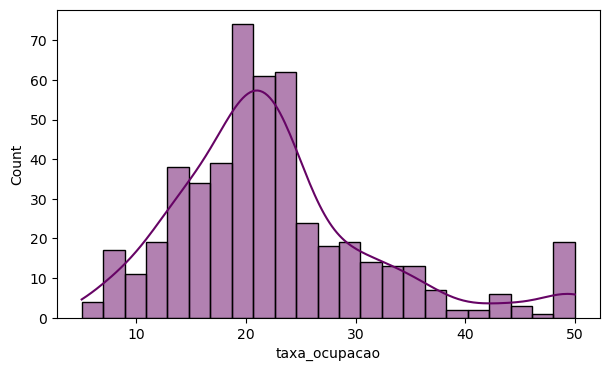

In [11]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_ocupacao, kde = True, color = '#660465')
plt.show()

Análise: 

- A variável dependente parece estar ligeiramente assimétrica à direita.

Como a variável dependente está levemente distorcida, aplicaremos uma transformação logarítmica na coluna **taxa_ocupacao** e verificaremos a distribuição da coluna transformada. Por quê? Para evitar distorção nos dados, algo causado por valores discrepantes. O objetivo com essa transformação é analisar e compreender o padrão nos dados.

Vamos verificar a assimetria (skewness) de todas as variáveis.

In [12]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
dtype: float64

Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida. Um valor entre 0,5 e 1 ou -0,5 e -1 é moderadamente distorcido. Um valor entre -0,5 e 0,5 indica que a distribuição é bastante simétrica.

In [13]:
# Transformação de log
dados['taxa_ocupacao_log'] = np.log(dados['taxa_ocupacao'])

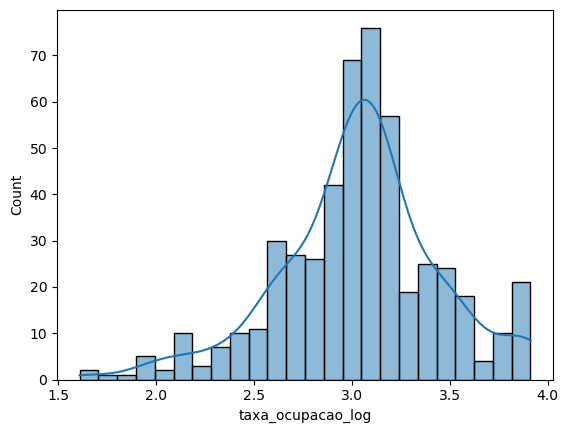

In [14]:
sns.histplot(data = dados, x = 'taxa_ocupacao_log', kde = True);

In [15]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
taxa_ocupacao_log                     -0.332872
dtype: float64

In [16]:
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059


Análise:

- A distorção foi reduzida. Agora a variável dependente apresenta estar moderadamente distorcida.


- A variável log-transformada (**taxa_ocupacao_log**) parece ter uma distribuição quase normal sem distorção e, portanto, podemos prosseguir.

Antes de criar o modelo de regressão linear, é importante verificar a relação bivariada entre as variáveis. Vamos verificar o mesmo usando o mapa de calor e o gráfico de dispersão.

## Análise Bivariada

Vamos verificar a correlação usando um mapa de calor. A correlação é um coeficiente da relação das variáveis que pode assumir valores de -1 a +1, sendo:

- O valor de -1 indica forte correlação negativa.
- O valor de +1 indica forte correlação positiva.
- O valor de zero indica que não há correlação.

**Notas:**

- Queremos uma alta correlação das variáveis preditoras com a variável alvo e uma baixa correlação entre as variáveis preditoras. 
- Alta correlação entre as variáveis preditoras (positiva ou negativa) indica problema de multicolinearidade e tem que ser resolvido.

In [17]:
# Matriz de correlação
dados.corr()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
numero_medio_quartos_por_residencia,1.000000,-0.243044,-0.218919,0.314221,-0.393012,0.092122,-0.303151,0.208031,-0.208559,-0.291159,-0.362163,0.127517,-0.613654,0.696424,0.632340
idade_media_residencias,-0.243044,1.000000,0.355852,-0.568654,0.645526,0.088155,0.731859,-0.747426,0.463883,0.512673,0.258119,-0.276578,0.608452,-0.376758,-0.454326
taxa_criminalidade,-0.218919,0.355852,1.000000,-0.203363,0.407351,-0.057316,0.422339,-0.384391,0.624880,0.581835,0.297472,-0.383776,0.454628,-0.390960,-0.530713
proporcao_lotes,0.314221,-0.568654,-0.203363,1.000000,-0.534292,-0.044375,-0.516414,0.663235,-0.319191,-0.320072,-0.388901,0.178462,-0.417814,0.359733,0.363476
proporcao_empresas,-0.393012,0.645526,0.407351,-0.534292,1.000000,0.063174,0.763810,-0.709502,0.599156,0.724065,0.384794,-0.357710,0.606354,-0.484606,-0.542907
rio_no_bairro,0.092122,0.088155,-0.057316,-0.044375,0.063174,1.000000,0.091835,-0.101685,-0.010326,-0.037972,-0.119013,0.050259,-0.055847,0.174606,0.158163
taxa_poluicao,-0.303151,0.731859,0.422339,-0.516414,0.763810,0.091835,1.000000,-0.770068,0.616414,0.671652,0.188255,-0.381440,0.593524,-0.427432,-0.511366
distancia_centro,0.208031,-0.747426,-0.384391,0.663235,-0.709502,-0.101685,-0.770068,1.000000,-0.505664,-0.543241,-0.226258,0.296059,-0.504135,0.248688,0.343079
index_acessibilidade,-0.208559,0.463883,0.624880,-0.319191,0.599156,-0.010326,0.616414,-0.505664,1.000000,0.909742,0.482377,-0.442594,0.485830,-0.387305,-0.487378
imposto_residencial,-0.291159,0.512673,0.581835,-0.320072,0.724065,-0.037972,0.671652,-0.543241,0.909742,1.000000,0.475243,-0.440226,0.541711,-0.473117,-0.565867


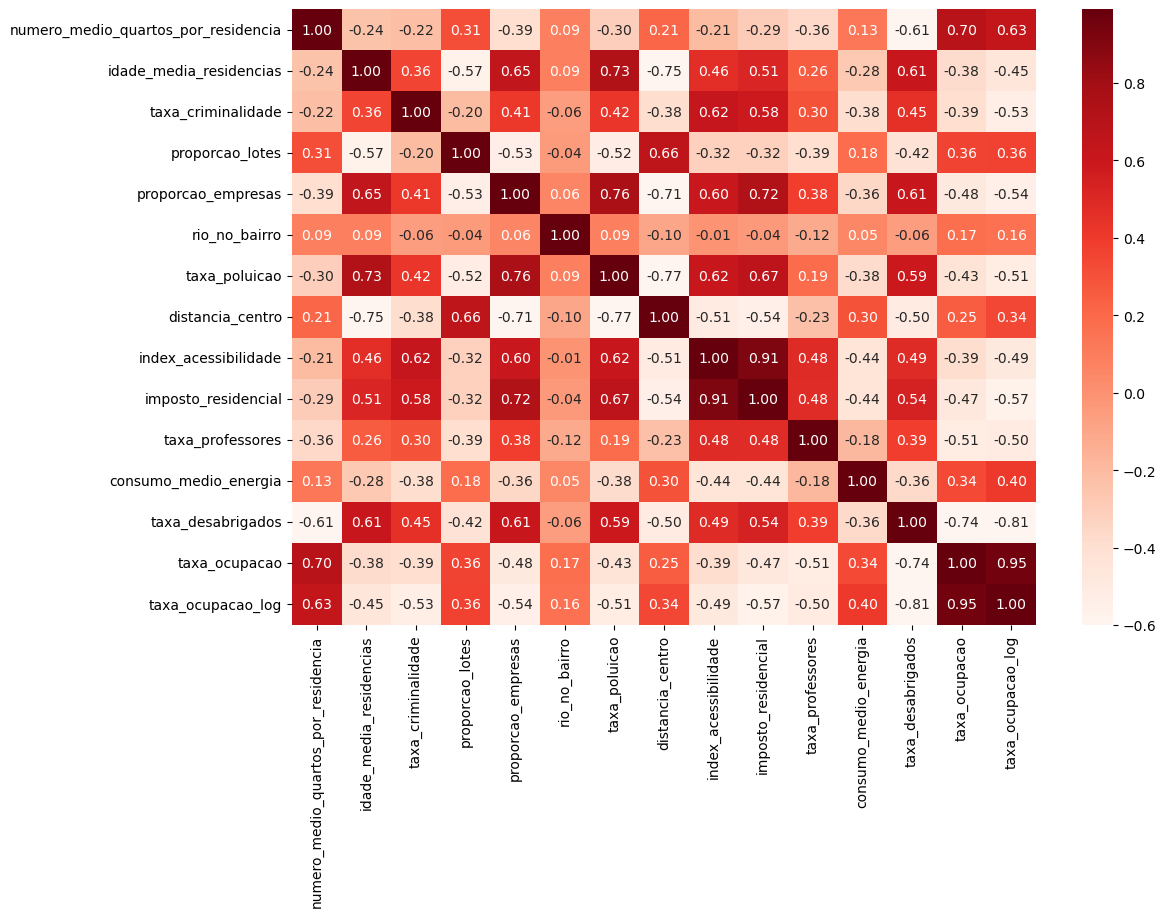

In [18]:
# Tamanho da figura
plt.figure(figsize = (12,8))

# Mapa de calor
# Estamos realçando os valores de correlação entre 0.59 e 0.99, positivo ou negativo.
sns.heatmap(dados.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

Análise:

- Vemos uma correlação significativa entre as variáveis **taxa_poluicao** e **proporcao_empresas**.


- A variável **taxa_poluicao** também apresenta um alto valor de correlação positiva com a **idade_media_residencias**, bem como um valor significativamente correlacionado negativamente com a **distancia_centro**.


- A variável **proporcao_empresas** tem um alto valor de correlação com **imposto_residencial**.


- A **taxa_ocupacao** tem um alto valor de correlação com **numero_medio_quartos_por_residencia**, e também significativamente correlacionado negativamente com **taxa_desabrigados**.


- Analise todas as correlações entre 0.59 e 0.99.

Vamos analisar mais de perto as variáveis com maior correlação.

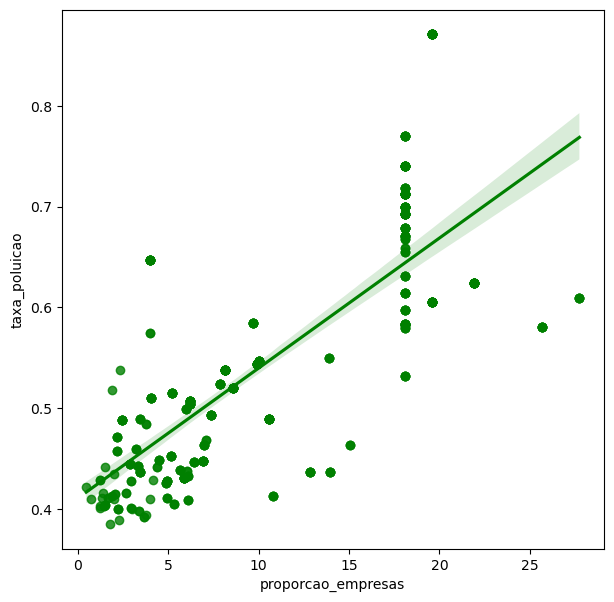

In [19]:
# Scatter Plot 1
plt.figure(figsize = (7, 7))
sns.regplot(x = 'proporcao_empresas', y = 'taxa_poluicao', data = dados, color = 'green') 
plt.show()

In [20]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['proporcao_empresas'], 
                                                     dados['taxa_poluicao'])[0])

A Correlação entre as variáveis é: 0.7638104350783941


Análise:

- **Correlação Positiva**: A taxa de poluição aumenta em bairros com maior proporção de empresas.

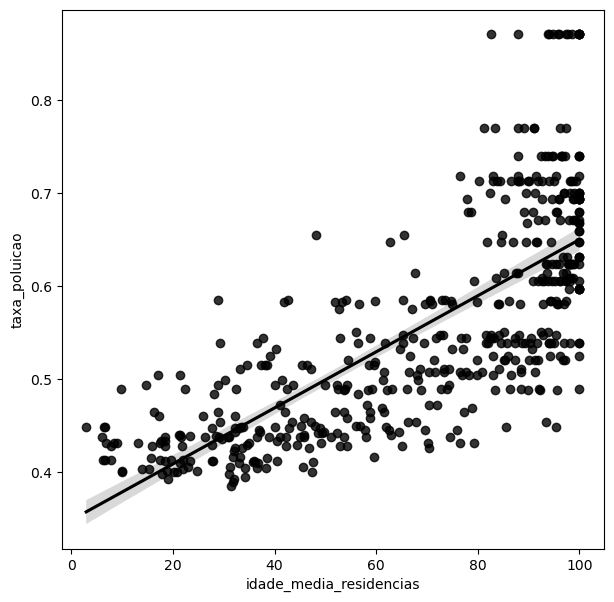

In [21]:
# Scatter Plot 2
plt.figure(figsize = (7, 7))
sns.regplot(x = 'idade_media_residencias', y = 'taxa_poluicao', data = dados, color = 'black') 
plt.show()

In [22]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['idade_media_residencias'], 
                                                     dados['taxa_poluicao'])[0])

A Correlação entre as variáveis é: 0.7318586310142242


Análise:

- **Correlação Positiva**: A taxa de poluição aumenta em bairros com residências de maior idade (construídas há mais tempo).

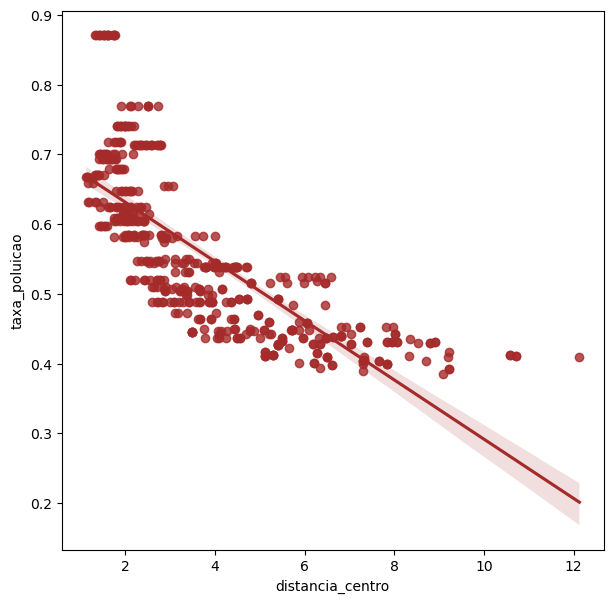

In [23]:
# Scatter Plot 3
plt.figure(figsize = (7, 7))
sns.regplot(x = 'distancia_centro', y = 'taxa_poluicao', data = dados, color = 'brown') 
plt.show()

In [24]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['distancia_centro'], 
                                                     dados['taxa_poluicao'])[0])

A Correlação entre as variáveis é: -0.7700682232177496


Análise:

- **Correlação Negativa**: A taxa de poluição diminui em bairros à medida que aumenta a distância para o centro da cidade.

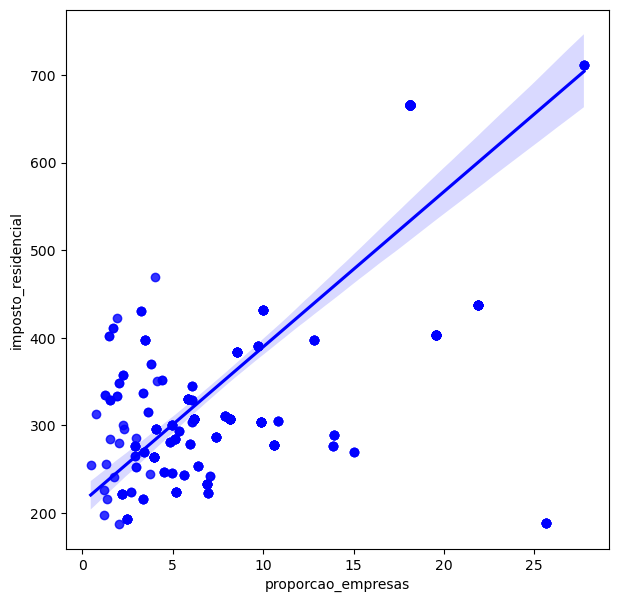

In [25]:
# Scatter Plot 4
plt.figure(figsize = (7, 7))
sns.regplot(x = 'proporcao_empresas', y = 'imposto_residencial', data = dados, color = 'blue') 
plt.show()

In [26]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['proporcao_empresas'], 
                                                     dados['imposto_residencial'])[0])

A Correlação entre as variáveis é: 0.724065315075632


Análise:

- **Correlação Positiva**: O imposto aumenta com um aumento na proporção de empresas por bairro. Isso pode ser devido ao fato das variáveis estarem relacionadas com uma terceira variável.

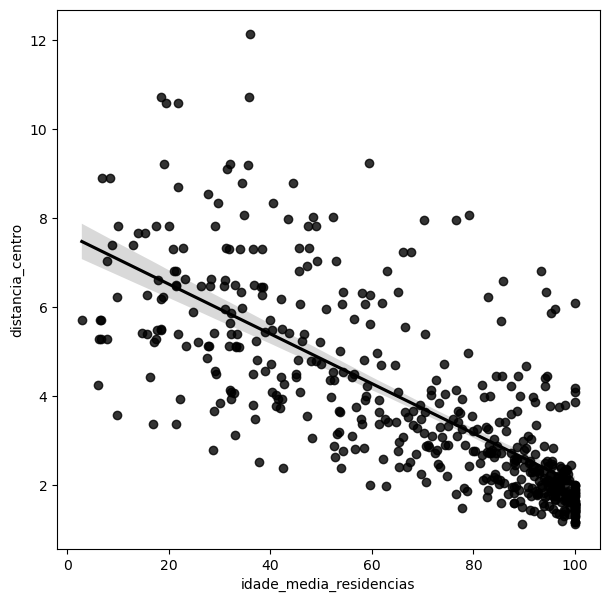

In [27]:
# Scatter Plot 5
plt.figure(figsize = (7, 7))
sns.regplot(x = 'idade_media_residencias', y = 'distancia_centro', data = dados, color = 'black')
plt.show()

In [28]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['idade_media_residencias'], 
                                                     dados['distancia_centro'])[0])

A Correlação entre as variáveis é: -0.7474258681640552


Análise:

- **Correlação Negativa**: À medida que aumenta a distância do cento, diminui a idade média das residências.

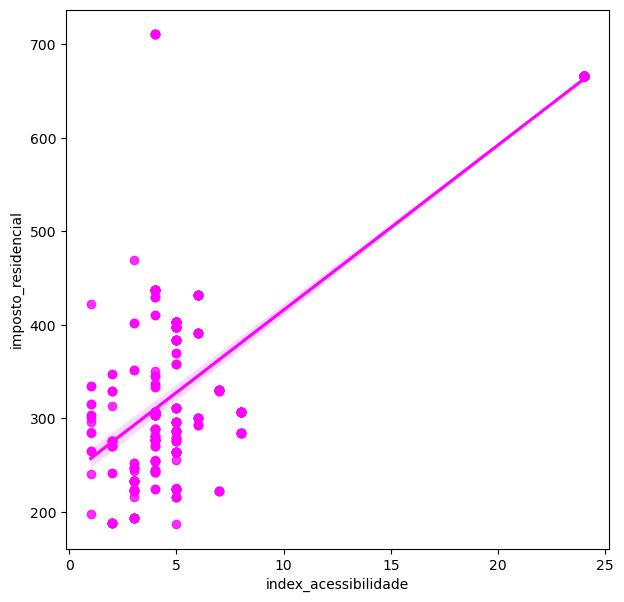

In [29]:
# Scatter Plot 6
plt.figure(figsize = (7, 7))
sns.regplot(x = 'index_acessibilidade', y = 'imposto_residencial', data = dados, color = 'magenta')
plt.show()

In [30]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['index_acessibilidade'], 
                                                     dados['imposto_residencial'])[0])

A Correlação entre as variáveis é: 0.9097418944674464


Análise:

- **Correlação Positiva**: A correlação entre as variáveis é muito alta, mas nenhuma tendência é visível entre as duas variáveis. Isso pode ser devido a outliers. 

Vamos realizar um trabalho de tratamento de outliers nas variáveis do gráfico anterior. E então vamos verificar a correlação depois de remover os valores discrepantes. Quando plotamos o histograma na análise univariada observamos que a maioria dos valores está abaixo de 600. Vamos criar o plot novamente.

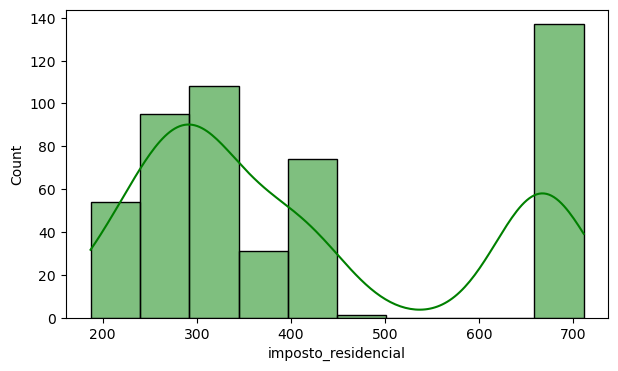

In [31]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.imposto_residencial, kde = True, color = 'green')
plt.show()

In [32]:
# Removendo outliers (mantemos apenas o que for menor que 600)
df1 = dados[dados['imposto_residencial'] < 600]

In [33]:
# Coeficiente de Correlação (observe que não alteramos o dataset original e por isso estamos usando df1)
print('A Correlação entre as variáveis é:', pearsonr(df1['imposto_residencial'], 
                                                     df1['index_acessibilidade'])[0])

A Correlação entre as variáveis é: 0.23887638770857889


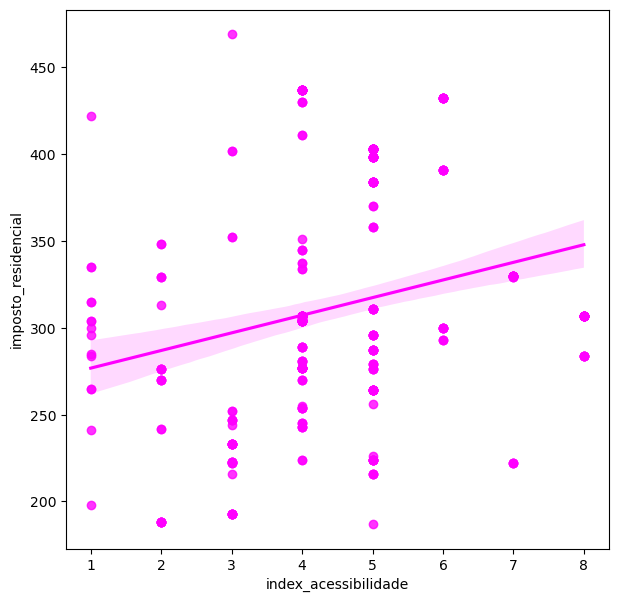

In [34]:
# Scatter Plot 6
plt.figure(figsize = (7, 7))
sns.regplot(x = 'index_acessibilidade', y = 'imposto_residencial', data = df1, color = 'magenta')
plt.show()

In [35]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(df1['imposto_residencial'], 
                                                     df1['index_acessibilidade'])[0])

A Correlação entre as variáveis é: 0.23887638770857889


Análise:

- **Correlação Positiva**.

- A correlação entre as duas variáveis era de 0.91 antes de remover os outliers. Caiu para 0.24 após a remoção.

- Portanto, a alta correlação entre as variáveis se deve aos outliers. O valor do imposto para algumas propriedades pode ser maior devido a algum outro motivo. 
- Não parece haver relação entre as duas variáveis diretamente.

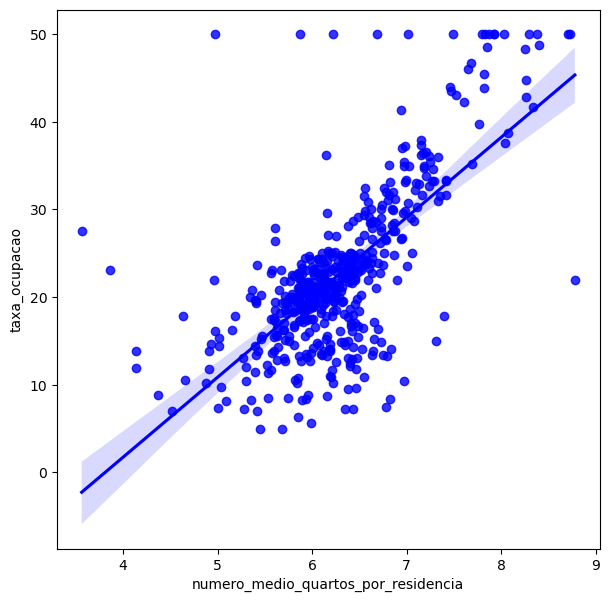

In [36]:
# Scatter Plot 7
plt.figure(figsize = (7, 7))
sns.regplot(x = 'numero_medio_quartos_por_residencia', y = 'taxa_ocupacao', data = dados, color = 'blue')
plt.show()

In [37]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['numero_medio_quartos_por_residencia'], 
                                                     dados['taxa_ocupacao'])[0])

A Correlação entre as variáveis é: 0.6964238264843786


Análise:

- **Correlação Positiva**.

- A taxa de ocupação das casas parece aumentar à medida que aumenta o número médio de quartos na residência. Isso é esperado, pois a taxa de ocupação pode ser mais alta se houver mais quartos.

- Existem alguns valores discrepantes em uma linha horizontal no topo do gráfico. Parece indicar um limite nos dados.

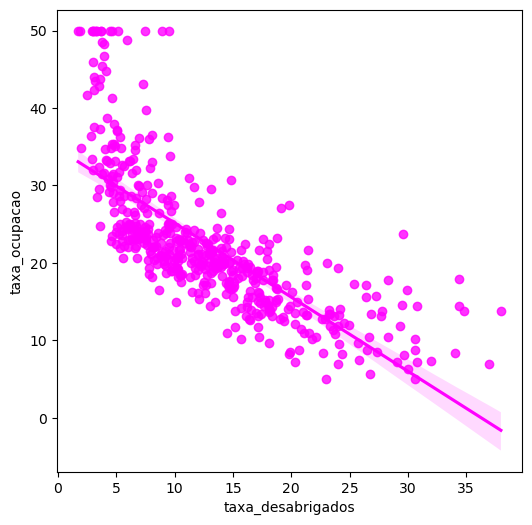

In [38]:
# Scatter Plot 8
plt.figure(figsize = (6, 6))
sns.regplot(x = 'taxa_desabrigados', y = 'taxa_ocupacao', data = dados, color = 'magenta')
plt.show()

In [39]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['taxa_desabrigados'], 
                                                     dados['taxa_ocupacao'])[0])

A Correlação entre as variáveis é: -0.7422362776461561


Análise:

- **Correlação Positiva**. 

- Bairros com maior número de desabrigados (moradores de rua) apresentam uma taxa menor de ocupação das residências.

- Existem poucos outliers e os dados parecem estar limitados a 50.

### Conclusão da Análise Exploratória

> Existem relações significativas entre algumas variáveis independentes, o que não é desejável para um modelo de regressão linear e decisões terão que ser tomadas. E tomaremos as decisões com base em análise dos dados. Vamos seguir adiante.

## Preparação dos Dados

Vamos dividir o conjunto de dados em variáveis X e Y e então dividir os dados em treino e teste com proporção 80/20.

In [40]:
# Separando as variáveis
Y = dados['taxa_ocupacao_log']
X = dados.drop(columns = {'taxa_ocupacao', 'taxa_ocupacao_log'})

In [41]:
# Divide os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.20 , random_state = 1)

In [42]:
X_treino.shape

(400, 13)

In [43]:
X_teste.shape

(100, 13)

In [44]:
y_treino.shape

(400,)

In [45]:
y_teste.shape

(100,)

## Modelagem Estatística - Primeira Versão do Modelo

Aqui usaremos os dados de entrada no seu estado bruto original.

Não perca o objetivo de vista: Quais fatores mais influenciam na taxa de ocupação de imóveis?

In [46]:
# Adiciona a constante (intercepto)
# Isso é requerido pelo Statsmodels
X_treino_const = sm.add_constant(X_treino)

In [47]:
X_treino_const.shape

(400, 14)

In [48]:
type(X_treino_const)

pandas.core.frame.DataFrame

In [49]:
# Cria o modelo
modelo_v1 = sm.OLS(y_treino, X_treino_const).fit()

> Você vai encontrar na sequência um manual descrevendo cada um dos itens da tabela abaixo, tudo explicado passo a passo. Leia o material antes de seguir com as aulas deste projeto.

In [50]:
# Sumário do modelo
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     120.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.52e-127
Time:                        18:39:04   Log-Likelihood:                 111.52
No. Observations:                 400   AIC:                            -195.0
Df Residuals:                     386   BIC:                            -139.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.0295      0.227     17.766      0.000       3.584       4.475
numero_medio_quartos_por_residencia     0.0952      0.019      5.035      0.000       0.058       0.132
idade_media_residencias                 0.0009      0.001      1.607      0.109      -0.000       0.002
taxa_criminalidade                     -0.0102      0.001     -7.713      0.000      -0.013      -0.008
proporcao_lotes                         0.0015      0.001      2.372      0.018       0.000       0.003
proporcao_empresas                      0.0017      0.003      0.628      0.530      -0.004       0.007
rio_no_bairro                           0.0895      0.036      2.477      0.014       0.018       0.161
taxa_poluicao                          -0.7708      0.167     -4.628      0.000      -1.098      -0.443
distancia_centro                       -0.0462      0.009     -5.221      0.000      -0.064      -0.029
index_acessibilidade                    0.0135      0.003      4.409      0.000       0.007       0.019
imposto_residencial                    -0.0006      0.000     -3.599      0.000      -0.001      -0.000
taxa_professores                       -0.0338      0.006     -5.678      0.000      -0.046      -0.022
consumo_medio_energia                   0.0002      0.000      2.048      0.041    9.67e-06       0.000
taxa_desabrigados                      -0.0308      0.002    -13.331      0.000      -0.035      -0.026
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.106
Skew:                           0.616   Prob(JB):                     1.90e-37
Kurtosis:                       5.938   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Coeficientes aprendidos pelo modelo
modelo_v1.params

const                                  4.029452
numero_medio_quartos_por_residencia    0.095247
idade_media_residencias                0.000948
taxa_criminalidade                    -0.010173
proporcao_lotes                        0.001451
proporcao_empresas                     0.001684
rio_no_bairro                          0.089488
taxa_poluicao                         -0.770793
distancia_centro                      -0.046237
index_acessibilidade                   0.013476
imposto_residencial                   -0.000623
taxa_professores                      -0.033816
consumo_medio_energia                  0.000242
taxa_desabrigados                     -0.030751
dtype: float64

Análise:

- O modelo apresenta boa performance com valor do coeficiente R2 acima de 0.8. Mas observe a nota 2 ao final do sumário do modelo.

## Verificando a Multicolinearidade com VIF

Em seguida, verificaremos a multicolinearidade no conjunto de dados de treino. Utilizaremos o Variance Inflation Factor (VIF), para verificar se há multicolinearidade nos dados.

O Variance Inflation Factor (VIF) é uma medida que quantifica o quanto a variância de um estimador de regressão (coeficiente) é aumentada devido à multicolinearidade na regressão múltipla. A multicolinearidade ocorre quando há correlações altas entre duas ou mais variáveis explicativas (independentes) em um modelo de regressão, o que pode dificultar a estimação dos coeficientes da regressão com precisão.

Variáveis com score (pontuação) VIF > 5 serão descartados/tratados até que todos os recursos tenham pontuação VIF < 5.

In [52]:
# Função para checar o VIF de todas as variáveis
def verifica_vif(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [53]:
type(X_treino)

pandas.core.frame.DataFrame

In [54]:
# Estamos verificando o VIF sem a constante requerida pelo Statsmodels
print(verifica_vif(X_treino))

                                feature        VIF
0   numero_medio_quartos_por_residencia  79.891041
1               idade_media_residencias  21.999229
2                    taxa_criminalidade   1.986129
3                       proporcao_lotes   2.995889
4                    proporcao_empresas  14.274312
5                         rio_no_bairro   1.163134
6                         taxa_poluicao  72.198368
7                      distancia_centro  15.124267
8                  index_acessibilidade  16.869623
9                   imposto_residencial  66.888831
10                     taxa_professores  89.425493
11                consumo_medio_energia  20.530499
12                    taxa_desabrigados  11.856588


Análise:

- A maioria das variáveis apresentou o VIF muito alto. Será que a escala nos dados afetou o cálculo? Provavelmente sim. Vamos ajustar isso agora.

## Padronização dos Dados

In [55]:
# Cria o padronizador
scaler = StandardScaler()

In [56]:
# Fit e transform em treino
X_treino_scaled = scaler.fit_transform(X_treino)

In [57]:
X_treino_scaled.shape

(400, 13)

In [58]:
# Transform em teste
X_teste_scaled = scaler.transform(X_teste)

In [59]:
X_teste_scaled.shape

(100, 13)

## Modelagem Estatística - Segunda Versão do Modelo

Aqui usaremos os dados padronizados (na mesma escala).

In [60]:
# Adiciona a constante (obrigatório para modelos criados com Statsmodels)
X_treino_const = sm.add_constant(X_treino_scaled)

In [61]:
type(X_treino_const)

numpy.ndarray

In [62]:
X_treino_const.shape

(400, 14)

In [63]:
type(y_treino)

pandas.core.series.Series

In [64]:
y_treino.shape

(400,)

In [65]:
# Criando a segunda versão do modelo
modelo_v2 = sm.OLS(y_treino, X_treino_const).fit()

In [66]:
# Sumário
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     120.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.52e-127
Time:                        18:39:04   Log-Likelihood:                 111.52
No. Observations:                 400   AIC:                            -195.0
Df Residuals:                     386   BIC:                            -139.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.009    326.592      0.000       3.025       3.062
x1             0.0668      0.013      5.035      0.000       0.041       0.093
x2             0.0269      0.017      1.607      0.109      -0.006       0.060
x3            -0.0940      0.012     -7.713      0.000      -0.118      -0.070
x4             0.0343      0.014      2.372      0.018       0.006       0.063
x5             0.0116      0.018      0.628      0.530      -0.025       0.048
x6             0.0239      0.010      2.477      0.014       0.005       0.043
x7            -0.0906      0.020     -4.628      0.000      -0.129      -0.052
x8            -0.0987      0.019     -5.221      0.000      -0.136      -0.062
x9             0.1180      0.027      4.409      0.000       0.065       0.171
x10           -0.1059      0.029     -3.599      0.000      -0.164      -0.048
x11           -0.0731      0.013     -5.678      0.000      -0.098      -0.048
x12            0.0220      0.011      2.048      0.041       0.001       0.043
x13           -0.2191      0.016    -13.331      0.000      -0.251      -0.187
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.106
Skew:                           0.616   Prob(JB):                     1.90e-37
Kurtosis:                       5.938   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:
    
- O R-Squared é praticamente o mesmo indicando que o modelo tem boa performance. Vamos então checar o VIF.

In [67]:
dados.columns

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'index_acessibilidade', 'imposto_residencial', 'taxa_professores',
       'consumo_medio_energia', 'taxa_desabrigados', 'taxa_ocupacao',
       'taxa_ocupacao_log'],
      dtype='object')

In [68]:
type(X_treino_scaled)

numpy.ndarray

In [69]:
# Converte o array NumPy para dataframe do Pandas (requerido para o VIF)
df_X_treino = pd.DataFrame(X_treino_scaled)

In [70]:
type(df_X_treino)

pandas.core.frame.DataFrame

In [71]:
print(verifica_vif(df_X_treino))

    feature       VIF
0         0  2.028621
1         1  3.216635
2         2  1.708968
3         3  2.409812
4         4  3.920927
5         5  1.074111
6         6  4.415409
7         7  4.114200
8         8  8.242494
9         9  9.966244
10       10  1.906999
11       11  1.330456
12       12  3.109482


In [72]:
# Precisamos de um dataframe para checar o VIF. Vamos incluir o nome de cada coluna para facilitar a análise.
df_X_treino = pd.DataFrame(X_treino_scaled, columns = ['numero_medio_quartos_por_residencia',
                                                       'idade_media_residencias',
                                                       'taxa_criminalidade',
                                                       'proporcao_lotes',
                                                       'proporcao_empresas', 
                                                       'rio_no_bairro',
                                                       'taxa_poluicao',
                                                       'distancia_centro',
                                                       'index_acessibilidade', 
                                                       'imposto_residencial', 
                                                       'taxa_professores',
                                                       'consumo_medio_energia', 
                                                       'taxa_desabrigados'])

In [73]:
print(verifica_vif(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  2.028621
1               idade_media_residencias  3.216635
2                    taxa_criminalidade  1.708968
3                       proporcao_lotes  2.409812
4                    proporcao_empresas  3.920927
5                         rio_no_bairro  1.074111
6                         taxa_poluicao  4.415409
7                      distancia_centro  4.114200
8                  index_acessibilidade  8.242494
9                   imposto_residencial  9.966244
10                     taxa_professores  1.906999
11                consumo_medio_energia  1.330456
12                    taxa_desabrigados  3.109482


Análise:

- As variáveis index_acessibilidade e imposto_residencial apresentam um VIF maior que 5, indicando multicolinearidade. Vamos remover as variáveis.


- O VIF precisa ser calculado somente com dados de treino. Mas variáveis devem ser removidas em treino e teste!!!

In [74]:
del df_X_treino["index_acessibilidade"]

In [75]:
del df_X_treino["imposto_residencial"]

In [76]:
df_X_treino.shape

(400, 11)

In [77]:
df_X_treino.columns

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'taxa_professores', 'consumo_medio_energia', 'taxa_desabrigados'],
      dtype='object')

In [78]:
# Convertemos o array de teste em dataframe de teste
df_X_teste = pd.DataFrame(X_teste_scaled, columns = ['numero_medio_quartos_por_residencia',
                                                     'idade_media_residencias',
                                                     'taxa_criminalidade',
                                                     'proporcao_lotes',
                                                     'proporcao_empresas', 
                                                     'rio_no_bairro',
                                                     'taxa_poluicao',
                                                     'distancia_centro',
                                                     'index_acessibilidade', 
                                                     'imposto_residencial', 
                                                     'taxa_professores',
                                                     'consumo_medio_energia', 
                                                     'taxa_desabrigados'])

In [79]:
del df_X_teste["index_acessibilidade"]

In [80]:
del df_X_teste["imposto_residencial"]

In [81]:
df_X_teste.shape

(100, 11)

In [82]:
print(verifica_vif(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  1.944437
1               idade_media_residencias  3.190144
2                    taxa_criminalidade  1.436394
3                       proporcao_lotes  2.250999
4                    proporcao_empresas  3.289783
5                         rio_no_bairro  1.057753
6                         taxa_poluicao  3.815908
7                      distancia_centro  4.113862
8                      taxa_professores  1.517930
9                 consumo_medio_energia  1.291092
10                    taxa_desabrigados  3.106567


Análise:

- Conseguimos remover a multicolinearidade do dataset e assim atendemos a uma das suposições da regressão linear.

In [83]:
# Converte o dataframe de volta para o formato NumPy
X_treino_scaled = df_X_treino.to_numpy()

In [84]:
X_treino_scaled.shape

(400, 11)

In [85]:
# Converte o dataframe de volta para o formato NumPy
X_teste_scaled = df_X_teste.to_numpy()

In [86]:
X_teste_scaled.shape

(100, 11)

## Modelagem Estatística - Terceira Versão do Modelo

Aqui usaremos os dados padronizados e sem as variáveis multicolineares.

In [87]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_scaled)

In [88]:
# Cria o modelo
modelo_v3 = sm.OLS(y_treino, X_treino_const).fit()

In [89]:
# Sumário
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.03e-125
Time:                        18:39:04   Log-Likelihood:                 101.69
No. Observations:                 400   AIC:                            -179.4
Df Residuals:                     388   BIC:                            -131.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    319.489      0.000       3.025       3.062
x1             0.0768      0.013      5.784      0.000       0.051       0.103
x2             0.0213      0.017      1.251      0.212      -0.012       0.055
x3            -0.0808      0.011     -7.073      0.000      -0.103      -0.058
x4             0.0255      0.014      1.786      0.075      -0.003       0.054
x5            -0.0101      0.017     -0.584      0.560      -0.044       0.024
x6             0.0288      0.010      2.937      0.004       0.010       0.048
x7            -0.0804      0.019     -4.319      0.000      -0.117      -0.044
x8            -0.0988      0.019     -5.111      0.000      -0.137      -0.061
x9            -0.0643      0.012     -5.477      0.000      -0.087      -0.041
x10            0.0185      0.011      1.706      0.089      -0.003       0.040
x11           -0.2171      0.017    -12.929      0.000      -0.250      -0.184
==============================================================================
Omnibus:                       61.536   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.597
Skew:                           0.655   Prob(JB):                     1.86e-46
Kurtosis:                       6.304   Cond. No.                         5.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Em modelagem estatística, o valor-p é uma medida da probabilidade de que os resultados observados tenham ocorrido por acaso. É comumente usado em testes de hipóteses para determinar se um determinado modelo ou hipótese é suportado pelos dados.

No contexto de uma tabela de modelagem estatística, o valor-p é normalmente apresentado como uma coluna na tabela e reflete a probabilidade de obter os resultados observados dada a suposição de que a hipótese nula é verdadeira. A hipótese nula é uma afirmação de que não há relação entre as variáveis preditoras e a variável de resposta no modelo.

Por exemplo, se o valor-p para uma determinada variável preditora na tabela de modelagem estatística for muito pequeno (geralmente menor que 0,05), isso indica que há uma probabilidade baixa de obter os resultados observados apenas por acaso e, portanto, a hipótese nula pode ser rejeitada. Isso sugere que existe uma relação estatisticamente significativa entre a variável preditora e a variável resposta.

Por outro lado, se o valor-p for grande (geralmente maior que 0,05), indica que os resultados observados podem ter ocorrido por acaso, e a hipótese nula não pode ser rejeitada. Nesse caso, não há evidências suficientes para sustentar a presença de uma relação entre a variável preditora e a variável resposta.

É importante observar que o valor-p é apenas um fator a ser considerado ao avaliar os resultados de um modelo estatístico. Outros fatores, como a magnitude do efeito e a força da associação, também devem ser levados em consideração na interpretação dos resultados do modelo.

Análise:

- O R2 caiu um pouco, mas ainda temos ótima performance.

- Variáveis x2, x5 e x10 apresentaram valor-p muito maior que 0.05. Logo, não parecem significantes para o modelo e vamos removê-las.

In [90]:
# Removemos as colunas de índice 1, 4 e 9 em treino
X_treino_clean = np.delete(X_treino_scaled, [1, 4, 9], axis = 1)

In [91]:
# Removemos as colunas de índice 1, 4 e 9 em teste
X_teste_clean = np.delete(X_teste_scaled, [1, 4, 9], axis = 1)

In [92]:
X_treino_clean.shape

(400, 8)

In [93]:
X_teste_clean.shape

(100, 8)

## Modelagem Estatística - Quarta Versão do Modelo

Aqui usaremos os dados padronizados, sem as variáveis multicolineares e sem as variáveis com baixa significância para explicar a variável alvo.

In [94]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_clean)

In [95]:
# Cria o modelo
modelo_v4 = sm.OLS(y_treino, X_treino_const).fit()

In [96]:
# Sumário
modelo_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     183.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.17e-127
Time:                        18:39:05   Log-Likelihood:                 98.927
No. Observations:                 400   AIC:                            -179.9
Df Residuals:                     391   BIC:                            -143.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    318.514      0.000       3.025       3.062
x1             0.0796      0.013      6.157      0.000       0.054       0.105
x2            -0.0855      0.011     -7.629      0.000      -0.108      -0.063
x3             0.0223      0.014      1.573      0.116      -0.006       0.050
x4             0.0300      0.010      3.063      0.002       0.011       0.049
x5            -0.0844      0.016     -5.202      0.000      -0.116      -0.053
x6            -0.1040      0.018     -5.794      0.000      -0.139      -0.069
x7            -0.0666      0.011     -5.905      0.000      -0.089      -0.044
x8            -0.2133      0.015    -13.938      0.000      -0.243      -0.183
==============================================================================
Omnibus:                       57.577   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.212
Skew:                           0.627   Prob(JB):                     3.67e-41
Kurtosis:                       6.099   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:

- O valor do R2 é quase o mesmo, mas agora sem variáveis multicolineares e sem variáveis irrelevantes. Precisamos remover a variável x3.

In [97]:
# Removemos a coluna de índice 2 em treino
X_treino_clean2 = np.delete(X_treino_clean, [2], axis = 1)

In [98]:
# Removemos a coluna de índice 2 em teste
X_teste_clean2 = np.delete(X_teste_clean, [2], axis = 1)

In [99]:
X_treino_clean2.shape

(400, 7)

In [100]:
X_teste_clean2.shape

(100, 7)

## Modelagem Estatística - Quinta Versão do Modelo

Aqui usaremos os dados padronizados, sem as variáveis multicolineares e sem as variáveis com baixa significância para explicar a variável alvo.

In [101]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_clean2)

In [102]:
# Cria o modelo
modelo_v5 = sm.OLS(y_treino, X_treino_const).fit()

In [103]:
# Sumário
modelo_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     208.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.24e-128
Time:                        18:39:05   Log-Likelihood:                 97.665
No. Observations:                 400   AIC:                            -179.3
Df Residuals:                     392   BIC:                            -147.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    317.916      0.000       3.025       3.062
x1             0.0829      0.013      6.491      0.000       0.058       0.108
x2            -0.0827      0.011     -7.458      0.000      -0.104      -0.061
x3             0.0297      0.010      3.026      0.003       0.010       0.049
x4            -0.0838      0.016     -5.155      0.000      -0.116      -0.052
x5            -0.0889      0.015     -5.849      0.000      -0.119      -0.059
x6            -0.0715      0.011     -6.579      0.000      -0.093      -0.050
x7            -0.2131      0.015    -13.900      0.000      -0.243      -0.183
==============================================================================
Omnibus:                       61.760   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.712
Skew:                           0.675   Prob(JB):                     2.61e-44
Kurtosis:                       6.197   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:

- O valor do R2 é quase o mesmo, mas agora sem variáveis multicolineares e sem variáveis irrelevantes.


- Concluímos a modelagem estatística e temos as melhores variáveis para prever a variável alvo.


- Podemos usar o modelo e extrair insights? Não. Temos que validar as suposições.

## Validação das Suposições da Regressão Linear

Podemos usar o modelo de regressão criado até aqui?

Sim, desde que as suposições sejam validadas.

**1- Linearidade**

**2- Independência dos Erros**

**3- Homocedasticidade**

**4- Normalização dos Erros**

**5- Sem Multicolinearidade**

Usaremos a última versão do modelo para fazer as validações.

### 1- Linearidade

Uma das suposições cruciais que testamos ao construir modelos baseados em mínimos quadrados ordinários ou regressões lineares é a linearidade nos parâmetros. 

A linearidade simplesmente implica que nossa variável dependente (Y) pode ser expressa como uma função linear das variáveis explicativas (X) que estamos escolhendo para explicar a variação na variável Y. Observe que o termo 'regressão linear' enfatiza a importância da suposição de linearidade.

A regressão linear precisa que a relação entre as variáveis independentes e dependentes seja linear. Também é importante verificar se há valores discrepantes, pois a regressão linear é sensível a efeitos extremos. A suposição de linearidade pode ser melhor testada com gráficos de dispersão ou usando o teste linear_rainbow.

O teste linear_rainbow é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Ele é chamado de "rainbow" porque ele usa vários valores de corte para dividir os dados em grupos e comparar os resíduos desses grupos. Se os resíduos dos grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

Para realizar o teste linear_rainbow com statsmodels, você pode usar o método linear_rainbow(). 

Para interpretar o resultado, você pode comparar o valor-p (resultado do teste) com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0 (Hipótese Nula). Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita.


* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.linear_rainbow.html

In [104]:
# Vamos construir uma função para automatizar a validação da suposição 1.

# Função
def valida_sup_1(nome_modelo):
    
    # Define o modelo
    modelo = nome_modelo
    
    # Aplica o linear_rainbow
    lin_p = sms.linear_rainbow(modelo, frac = 0.5)[1]
    
    print(lin_p)
    
    # Inicializa a variável com Falha
    result = "Rejeitamos a H0 (Hipótese Nula). Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita."
    
    # Testa o resultado
    if lin_p > 0.05:
        result = "Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita."
        
    # Retorno
    return np.transpose(pd.DataFrame([[lin_p], [0.05], [result]],
                                     index = ['Valor-p', 'Alfa', 'Resultado'],
                                     columns = ['Valor-p do Rainbow Linearity Test'] ))

In [105]:
# Aplica a função
valida_sup_1(modelo_v5)

0.7311264246842832


,Valor-p,Alfa,Resultado
Valor-p do Rainbow Linearity Test,0.731126,0.05,Sucesso! Falhamos em rejeitar a H0 (Hipótese N...


**Análise:**

Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

### 2- Independência dos Erros

Na regressão linear, a suposição de independência dos erros é a suposição de que os erros (resíduos) são independentes entre si. Isso significa que o valor de um erro não deve ser afetado pelo valor de qualquer outro erro.

Essa suposição é importante porque ela é necessária para que o cálculo dos intervalos de confiança e dos valores-p dos parâmetros seja preciso. Se a suposição de independência dos erros não for satisfeita, os intervalos de confiança e os valores-p podem ser imprecisos ou enganosos.

Para verificar se a suposição de independência dos erros está sendo satisfeita, você pode plotar um gráfico de resíduos versus tempo (se os dados forem observações ao longo do tempo) e verificar se há algum padrão evidente. Você também pode usar um teste estatístico, como o Teste de Durbin-Watson, para verificar se a suposição de independência dos erros está sendo satisfeita. Se a suposição de independência dos erros não for satisfeita, você pode tentar usar um modelo de regressão diferente ou incluir variáveis adicionais no modelo para controlar o efeito da dependência dos erros.

Para testar a suposição, plotaremos os resíduos e os valores ajustados em um gráfico e garantiremos que os resíduos não formem um padrão forte. Eles devem ser aleatoriamente e uniformemente espalhados no eixo x.

In [106]:
# Vamos extrair os resíduos do modelo_v5
residuals = modelo_v5.resid

In [107]:
print(residuals)

238   -0.166180
438   -0.030578
475   -0.054838
58     0.060189
380    0.166027
         ...   
255   -0.040429
72    -0.143031
396   -0.236106
235    0.007499
37    -0.097867
Length: 400, dtype: float64


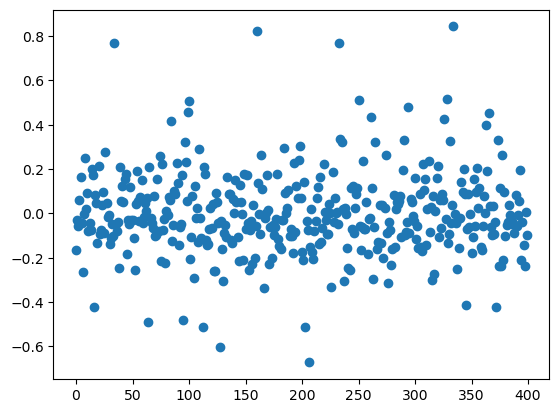

In [108]:
# Plot
plt.scatter(range(len(X_treino_clean2)), residuals);

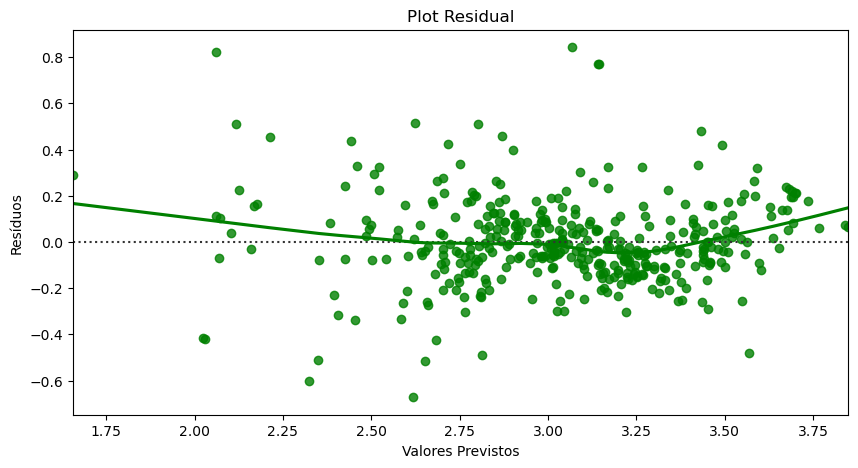

In [109]:
# Valores previstos
valores_previstos = modelo_v5.fittedvalues

# Plot
plt.figure(figsize = (10,5))
sns.residplot(x = valores_previstos, y = residuals, color = "green", lowess = True)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Plot Residual")
plt.show()

**Análise:**

- A média dos resíduos é muito próxima de 0, portanto, a suposição para os resíduos é satisfeita. Os resíduos são plotados aleatoriamente em torno de 0.
- Os resíduos "saltam aleatoriamente" em torno da linha 0. Isso sugere que não há autocorrelação.
- Os resíduos formam aproximadamente uma "faixa horizontal" em torno da linha 0. Isso sugere que as variâncias dos termos de erro são iguais.
- Nenhum resíduo "se destaca" do padrão aleatório básico de resíduos. Isso sugere que não há outliers.

O Teste de Durbin-Watson é um teste estatístico que verifica se a suposição de independência dos erros está sendo satisfeita em um modelo de regressão linear. Esse teste é especialmente útil quando os dados são observações ao longo do tempo, pois pode detectar autocorrelação nos erros.

Para aplicar o Teste de Durbin-Watson com statsmodels, você pode usar o método durbin_watson(). Esse método retorna um valor entre 0 e 4, onde valores próximos de 0 indicam autocorrelação positiva nos erros e valores próximos de 4 indicam autocorrelação negativa nos erros. Valores próximos de 2 indicam ausência de autocorrelação nos erros.

In [110]:
# Vamos construir uma função para automatizar a validação da suposição 2.

# Função
def valida_sup_2(residuos):
    
    import statsmodels
    
    # Define o modelo
    resultado = statsmodels.stats.stattools.durbin_watson(residuos)
    
    print('Resultado do teste:', resultado)
    
    # Interprete o resultado
    if resultado < 1.9:
        print("Há evidências de autocorrelação positiva nos erros! Suposição não satisfeita!")
    elif resultado > 2.1:
        print("Há evidências de autocorrelação negativa nos erros! Suposição não satisfeita!")
    else:
        print("Não há evidências de autocorrelação nos erros! Suposição satisfeita!")

In [111]:
valida_sup_2(residuals)

Resultado do teste: 2.013960439087898
Não há evidências de autocorrelação nos erros! Suposição satisfeita!


### 3- Homocedasticidade

A suposição de homocedasticidade (que significa “mesma variância”) é fundamental para os modelos de regressão linear. A homocedasticidade descreve uma situação em que o termo de erro (ou seja, o “ruído” ou perturbação aleatória na relação entre as variáveis independentes e a variável dependente) é o mesmo em todos os valores das variáveis independentes. 

A heterocedasticidade (a violação da homocedasticidade) está presente quando o tamanho do termo de erro difere entre os valores de uma variável independente. O impacto da violação do pressuposto da homocedasticidade é uma questão de grau, aumentando à medida que a heterocedasticidade aumenta.

Homocedasticidade - Se os resíduos forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados homocedásticos (a variabilidade é igual entre os valores de uma variável explicativa).

Heterocedasticidade - Se os resíduos não forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados heterocedásticos. Nesse caso, os resíduos podem ter uma forma de funil ou qualquer outra forma não simétrica.

**Resumindo:**

**A homocedasticidade é a propriedade de uma distribuição de dados em que a variabilidade dos dados é constante em todos os níveis de uma variável. Em outras palavras, a homocedasticidade ocorre quando os dados possuem uma variação constante em relação a uma determinada variável. Isso é diferente da heterocedasticidade, que ocorre quando a variabilidade dos dados é diferente em diferentes níveis da variável.**

**A homocedasticidade é importante em análises estatísticas porque alguns testes estatísticos pressupõem que os dados são homocedásticos. Se os dados não são homocedásticos, os resultados do teste podem ser imprecisos ou enganosos.**

Usaremos o Teste de Goldfeldquandt para testar a seguinte hipótese com alfa = 0,05

- Hipótese nula (H0): Há evidências de heterocedasticidade (a regressão não é homocedástica).

- Hipótese alternativa (H1): Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica).

Nosso teste deve rejeitar a H0.

O Teste de Goldfeld-Quandt é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Esse teste é realizado dividindo os dados em dois grupos e comparando os resíduos dos dois grupos. Se os resíduos dos dois grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos dois grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

Para realizar o Teste de Goldfeld-Quandt com statsmodels, você pode usar o método het_goldfeldquandt(). 

Para interpretar o resultado, você pode comparar o valor-p com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. 


* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0. isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

O problema que a heterocedasticidade apresenta para modelos de regressão é simples. Lembre-se de que a regressão de mínimos quadrados ordinários (OLS) procura minimizar os resíduos e, por sua vez, produzir os menores erros padrão possíveis. Por definição, a regressão OLS dá peso igual a todas as observações, mas quando a heterocedasticidade está presente, os casos com maiores perturbações têm mais “atração” do que outras observações. Nesse caso, a regressão de mínimos quadrados ponderada seria mais apropriada, pois reduz o peso das observações com perturbações maiores.

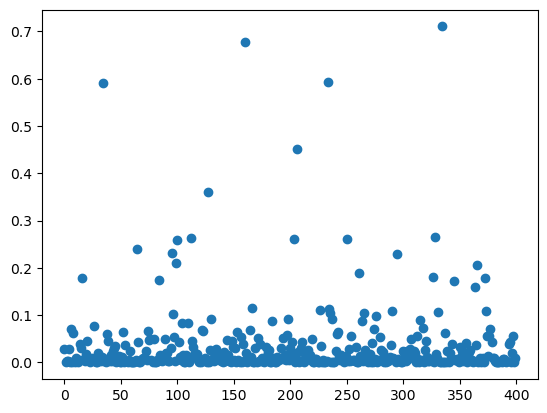

In [112]:
# Resíduos
residuals = modelo_v5.resid

# Plot
plt.scatter(range(len(X_treino_clean2)),np.square(residuals));

Como o gráfico não apresenta padrão, podemos concluir que não há heterocedasticidade. Mas vamos aplicar um teste estatístico.

In [113]:
# Função
def valida_sup_3(y, x):
    
    # Estatísticas
    estatisticas = ["F statistic", "p-value"]
    
    # Teste
    teste_goldfeldquandt = sms.het_goldfeldquandt(y, x)
    
    resultado = lzip(estatisticas, teste_goldfeldquandt)
    
    pval = resultado[1][1]
    
    if pval < 0.05:
        print("Há evidências de heterocedasticidade (a regressão não é homocedástica) e rejeitamos a H0. Suposição não satisfeita!")
    else:
        print("Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!")

In [114]:
# Aplica a função
valida_sup_3(y_treino, X_treino_clean2)

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!


**Análise:**

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!

### 4- Normalização dos Erros

Normalidade dos termos de erro. Os resíduos devem ser normalmente distribuídos.

Essa suposição pode ser melhor verificada com um histograma ou um Q-Q-Plot. 

Na regressão linear, a suposição de normalização dos resíduos é a suposição de que os resíduos (erros) da regressão seguem uma distribuição normal. Isso significa que os resíduos devem ter uma média zero e uma variância constante.

Essa suposição é importante porque alguns testes estatísticos e métodos de estimação de parâmetros pressupõem que os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, os resultados desses testes e métodos podem ser imprecisos ou enganosos.

Para verificar se os resíduos seguem uma distribuição normal, você pode plotar um gráfico de resíduos e observar se os resíduos seguem uma distribuição normal. Você também pode usar um teste de normalidade, como o Teste de Shapiro-Wilk, para verificar se os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, você pode tentar transformar os dados ou usar um modelo de regressão diferente.

In [115]:
residuals = modelo_v5.resid

<Axes: ylabel='Count'>

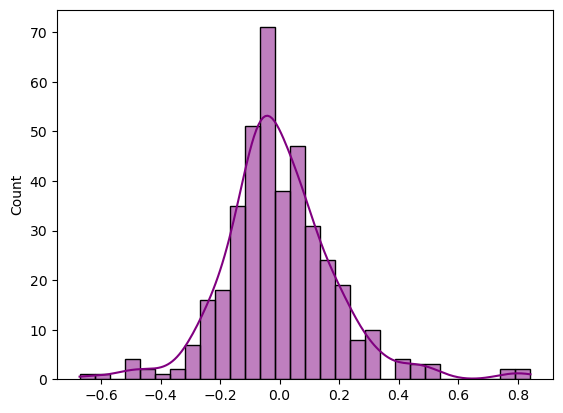

In [116]:
# Histograma dos resíduos
sns.histplot(residuals, kde = True, color = 'purple')

Vamos criar um QQ Plot.

Um gráfico qq (quantile-quantile) é um gráfico que é usado para comparar duas distribuições de dados. Ele é chamado de "qq" porque ele compara os quantis das duas distribuições. Os quantis são os valores que dividem os dados em partes iguais. Por exemplo, o primeiro quartil é o valor que divide os dados em um quarto menor e três quartos maiores.

Para interpretar um gráfico qq, você deve observar se os pontos seguem uma linha diagonal. Se os pontos seguirem uma linha diagonal, isso indica que as duas distribuições são similares. Se os pontos não seguirem uma linha diagonal, isso indica que as duas distribuições são diferentes.

Um gráfico qq é útil para verificar se os dados seguem uma distribuição específica, como a distribuição normal. Se os dados seguirem uma distribuição normal, os pontos no gráfico qq devem seguir uma linha diagonal. Se os pontos não seguirem uma linha diagonal, isso pode indicar que os dados não seguem uma distribuição normal.

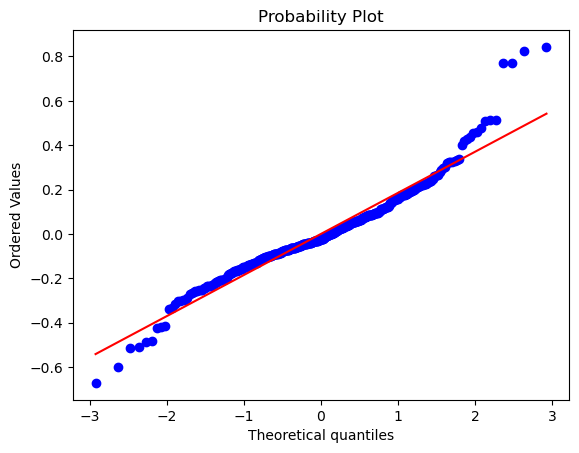

In [117]:
# QQ Plot
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

**Análise:**

Os resíduos seguem praticamente uma distribuição normal. A suposição estaria satisfeita. Vamos aplicar o Teste de Shapiro-Wilk aos resíduos para confirmar.

Para interpretar o resultado do teste, você pode comparar o valor-p com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal. 

* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0. Isso indica que os resíduos seguem uma distribuição normal.

In [118]:
# Função
def valida_sup_4(residuos):
    
    from scipy.stats import shapiro
    
    # Aplica o teste
    resultado = shapiro(residuos)
    
    # Extrai o valor-p
    pval = resultado.pvalue
    
    print('Valor-p =', pval)
    
    if pval < 0.05:
        print("Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!")
    else:
        print("Falhamos em rejeitar a H0. Isso indica que os resíduos seguem uma distribuição normal. Suposição satisfeita!")

In [119]:
valida_sup_4(residuals)

Valor-p = 1.262533272372579e-10
Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!


**Análise:**

Os resíduos não passaram no teste de normalidade. Provavelmente a diferença é pouca, mas essa suposição não foi satisfeita.

Notas:

1- Nem a variável dependente nem a variável independente precisam ser normalmente distribuídas. Na verdade, elas podem ter todos os tipos de distribuições. A suposição de normalidade se aplica à distribuição dos erros.

2- Às vezes, a não normalidade dos resíduos indica a presença de outliers. Se for esse o caso, lide com os valores discrepantes primeiro.

3- Talvez usar algumas transformações resolva o problema, porém, tem consequências. Como a interpretação dos coeficientes muda se transformarmos variáveis.

4- Eu não diria que esse modelo linear é completamente inútil. No entanto, isso significa que o modelo não explica corretamente/completamente os dados. Há uma parte em que você precisa decidir se o modelo é "bom o suficiente" ou não.

5- Modelos com superajustes (overfitting), podem apresentar resíduos não normais.

O ideal é retornar e trabalhar mais nos dados e/ou no modelo e checar novamente as suposições, mas este artigo abaixo traz uma discussão interessante sobre o tema e afirma que o teste t e a regressão linear de mínimos quadrados não requerem nenhuma suposição de distribuição Normal em amostras suficientemente grandes (Big Data).

https://www.annualreviews.org/doi/full/10.1146/annurev.publhealth.23.100901.140546

### Multicolinearidade

In [120]:
# Função para checar o VIF de todas as variáveis
def valida_sup_5(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [121]:
print(valida_sup_5(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  1.944437
1               idade_media_residencias  3.190144
2                    taxa_criminalidade  1.436394
3                       proporcao_lotes  2.250999
4                    proporcao_empresas  3.289783
5                         rio_no_bairro  1.057753
6                         taxa_poluicao  3.815908
7                      distancia_centro  4.113862
8                      taxa_professores  1.517930
9                 consumo_medio_energia  1.291092
10                    taxa_desabrigados  3.106567


**Análise:**

Não há multicolinearidade nos dados. Suposição satisfeita.

## Conclusão

Nosso modelo atendeu praticamente a todas as suposições. O ideal seria retornar e tentar ajustar o modelo até satisfazer plenamente a todas as suposições ou considerar se o modelo é bom o suficiente. 

Vamos considerar o modelo bom o suficiente para o nosso propósito pois os gráficos mostraram que estamos muito próximos da normalidade dos resíduos.

Vamos interpretar os resultados e entregar nossas conclusões.

In [122]:
# Coeficientes (o que o modelo aprendeu)
modelo_v5.params

const    3.043647
x1       0.082909
x2      -0.082661
x3       0.029659
x4      -0.083773
x5      -0.088921
x6      -0.071510
x7      -0.213070
dtype: float64

In [123]:
# Vamos criar um dataframe com os coeficientes
df = pd.DataFrame(modelo_v5.params)

In [124]:
df

,0
const,3.043647
x1,0.082909
x2,-0.082661
x3,0.029659
x4,-0.083773
x5,-0.088921
x6,-0.071510
x7,-0.213070


In [125]:
# Lista de colunas com os nomes das variáveis
colunas = ['const', 
           'numero_medio_quartos_por_residencia',
           'taxa_criminalidade',
           'rio_no_bairro',
           'taxa_poluicao',
           'distancia_centro',
           'taxa_professores',
           'taxa_desabrigados']

In [126]:
# Pivot da tabela
novo_df = pd.pivot_table(df, columns = colunas).reset_index()

In [127]:
novo_df

,index,const,distancia_centro,numero_medio_quartos_por_residencia,rio_no_bairro,taxa_criminalidade,taxa_desabrigados,taxa_poluicao,taxa_professores
0,0,3.043647,-0.088921,0.082909,0.029659,-0.082661,-0.21307,-0.083773,-0.07151


A variável alvo é taxa de ocupação!

O que significa o coeficiente? O sinal de um coeficiente de regressão linear informa se existe uma correlação positiva ou negativa entre cada variável independente e a variável dependente. Um coeficiente positivo indica que à medida que o valor da variável independente aumenta, a média da variável dependente também tende a aumentar. Um coeficiente negativo sugere que, à medida que a variável independente aumenta, a variável dependente tende a diminuir.

O valor do coeficiente significa o quanto a média da variável dependente muda, dado um deslocamento de uma unidade na variável independente enquanto mantém outras variáveis no modelo constante. Essa propriedade de manter as outras variáveis constantes é crucial porque permite avaliar o efeito de cada variável isoladamente das outras.

Os coeficientes de regressão linear em sua saída estatística são estimativas dos parâmetros reais da população. Para obter estimativas de coeficientes imparciais que tenham a variância mínima e poder confiar nos valores-p, seu modelo deve satisfazer as suposições clássicas da regressão linear OLS.

Os Cientistas de Dados consideram os coeficientes de regressão linear um tamanho de efeito não padronizado porque indicam a força da relação entre variáveis usando valores que retêm as unidades naturais da variável dependente. Os tamanhos de efeito ajudam a entender a importância das descobertas em um sentido prático. 

O modelo de regressão é um modelo linear, onde cada coeficiente representa a mudança esperada na variável dependente para uma unidade de mudança na variável independente correspondente, mantendo todas as outras variáveis constantes.

Aqui está a interpretação de cada coeficiente:

**const (3.043647)**: Este é o intercepto do modelo. Representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais a zero. Na prática, isso pode ou não ter um significado interpretável, dependendo de se faz sentido ou não ter todas as variáveis independentes zeradas.

**distancia_centro (-0.088921)**: Por cada unidade de aumento na distância até o centro, espera-se que a variável dependente diminua em 0.088921 unidades. Isso sugere uma relação negativa entre a distância do centro e a variável dependente.

**numero_medio_quartos_por_residencia (0.082909)**: Um aumento de uma unidade no número médio de quartos por residência está associado a um aumento de 0.082909 unidades na variável dependente. Isso indica uma relação positiva, sugerindo que residências com mais quartos podem ser mais valorizadas.

**rio_no_bairro (0.029659)**: Este coeficiente indica que a presença de um rio no bairro está associada a um aumento de 0.029659 unidades na variável dependente. Como rio_no_bairro é uma variável binária (0 ou 1), então ter um rio no bairro aumenta a variável dependente nessa quantidade.

**taxa_criminalidade (-0.082661)**: Por cada unidade de aumento na taxa de criminalidade, a variável dependente é esperada a diminuir em 0.082661 unidades. Isso sugere uma relação negativa, onde maior criminalidade pode depreciar o valor da variável dependente.

**taxa_desabrigados (-0.21307)**: Uma unidade de aumento na taxa de desabrigados está associada a uma diminuição de 0.21307 unidades na variável dependente, indicando uma forte relação negativa.

**taxa_poluicao (-0.083773)**: Um aumento de uma unidade na taxa de poluição está associado a uma diminuição de 0.083773 unidades na variável dependente, sugerindo que a poluição tem um impacto negativo.

**taxa_professores (-0.07151)**: Por cada unidade de aumento na taxa de professores, espera-se que a variável dependente diminua em 0.07151 unidades. Esse resultado é um pouco contra-intuitivo, já que normalmente esperaríamos uma relação positiva entre a qualidade/quantidade de ensino e o valor da variável dependente. Essa interpretação pode precisar de um exame mais detalhado do contexto ou da forma como a variável "taxa_professores" foi medida ou interpretada no modelo.

Cada coeficiente oferece insights sobre como as variáveis independentes influenciam a variável dependente. No entanto, é importante também considerar a significância estatística de cada coeficiente para determinar se as relações observadas são estatisticamente significativas.

### Variáveis Mais Relevantes

In [128]:
# Sumário
modelo_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     208.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.24e-128
Time:                        18:39:06   Log-Likelihood:                 97.665
No. Observations:                 400   AIC:                            -179.3
Df Residuals:                     392   BIC:                            -147.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    317.916      0.000       3.025       3.062
x1             0.0829      0.013      6.491      0.000       0.058       0.108
x2            -0.0827      0.011     -7.458      0.000      -0.104      -0.061
x3             0.0297      0.010      3.026      0.003       0.010       0.049
x4            -0.0838      0.016     -5.155      0.000      -0.116      -0.052
x5            -0.0889      0.015     -5.849      0.000      -0.119      -0.059
x6            -0.0715      0.011     -6.579      0.000      -0.093      -0.050
x7            -0.2131      0.015    -13.900      0.000      -0.243      -0.183
==============================================================================
Omnibus:                       61.760   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.712
Skew:                           0.675   Prob(JB):                     2.61e-44
Kurtosis:                       6.197   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para verificar as variáveis mais relevantes para prever a variável alvo, "taxa_ocupacao_log", no modelo de regressão linear, você pode considerar os seguintes aspectos do sumário do modelo:

1. Coeficientes (coef) e sua Significância (P>|t|):

Coeficientes (coef): Indicam o efeito esperado na variável dependente (taxa_ocupacao_log) para uma unidade de mudança na variável independente, mantendo as outras constantes. Valores mais altos (em magnitude absoluta) sugerem um impacto maior.

P>|t| (p-valor): Fornece a probabilidade de que o coeficiente seja igual a zero (nenhuma relação). Um valor abaixo de 0.05 é comumente considerado estatisticamente significativo, indicando que há evidências suficientes para afirmar que há uma relação entre a variável independente e a variável dependente.

2. Intervalos de Confiança ([0.025 0.975]):

Os intervalos de confiança mostram a faixa dentro da qual o verdadeiro coeficiente é esperado estar com 95% de confiança. Variáveis com intervalos que não incluem 0 têm uma relação significativa com a variável dependente.

Avaliando a Relevância das Variáveis:

Variáveis com p-valor baixo (< 0.05) são estatisticamente significativas e consideradas relevantes para o modelo. 

Em nosso caso, todas as variáveis, incluindo x1 a x7, são estatisticamente significativas para prever a taxa_ocupacao_log, pois todos os valores-p são menores que 0.05.

Magnitude dos coeficientes: A relevância também pode ser avaliada pela magnitude dos coeficientes (ignorando o sinal). Por exemplo, x7 (-0.2131) tem um impacto maior na taxa_ocupacao_log do que outras variáveis, dado o tamanho do seu coeficiente.

## Respondendo a Pergunta de Negócio:

Com base nos critérios acima, podemos determinar que todas as variáveis (x1 a x7) são relevantes para o modelo. Essas variáveis correspondem a:

- numero_medio_quartos_por_residencia
- taxa_criminalidade
- rio_no_bairro
- taxa_poluicao
- distancia_centro
- taxa_professores
- taxa_desabrigados

Essas variáveis são determinantes para explicar a taxa de ocupação, de acordo com a análise dos dados fornecidos.

In [129]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [130]:
#%watermark -v -m

In [131]:
#%watermark --iversions

# Fim